# Notes
# 1- 1D and 2D datasets are treated differently 
2- The 2D datasets are read directly, through their names. \
3- The 1D datasets need some more effort.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
import pandas as pd

# For 2D datasets, in both "Data_Fields" and "Geolocation Fields".

In [2]:
csat2019119path = r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS\2019119064142_69254_CS_2B-CLDCLASS_GRANULE_P1_R05_E08_F03.hdf"

from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V
hdf = SD(csat2019119path, SDC.READ)
csatfile = SD(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019119064142_69254_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf", SDC.READ)

csatfile.info()
#csat2019119 = h5py.File(csat2019119path)

(13, 2)

In [3]:
d = csatfile.select('CloudLayerBase') #CloudLayerBase is in Data_Fields, Height is in Geolocation Fields
cloudlayerbase=d[:,:]
type(cloudlayerbase),cloudlayerbase.shape

(numpy.ndarray, (36951, 10))

# For 1D datasets, in both "Data_Fields" and "Geolocation Fields", data read as a list

In [10]:
h = HDF.HDF(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019119064142_69254_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf")
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

In [11]:
latitude

[[-0.0012714399490505457],
 [-0.01097704004496336],
 [-0.020682640373706818],
 [-0.0303882397711277],
 [-0.040093839168548584],
 [-0.04979943856596947],
 [-0.05950504168868065],
 [-0.06921064108610153],
 [-0.07891623675823212],
 [-0.0886218398809433],
 [-0.09832744300365448],
 [-0.10803303867578506],
 [-0.11773864179849625],
 [-0.12744423747062683],
 [-0.137149840593338],
 [-0.1468554437160492],
 [-0.15656104683876038],
 [-0.16626659035682678],
 [-0.17597202956676483],
 [-0.18567746877670288],
 [-0.19538290798664093],
 [-0.20508834719657898],
 [-0.21479378640651703],
 [-0.22449924051761627],
 [-0.23420484364032745],
 [-0.24391044676303864],
 [-0.2536160349845886],
 [-0.2633216381072998],
 [-0.273027241230011],
 [-0.28273284435272217],
 [-0.2924382984638214],
 [-0.30214375257492065],
 [-0.3118491768836975],
 [-0.32155463099479675],
 [-0.3312600553035736],
 [-0.34096550941467285],
 [-0.35067105293273926],
 [-0.36037662625312805],
 [-0.37008222937583923],
 [-0.3797878324985504],
 [-0.3894

In [7]:
len(latitude),len(longitude)

(36951, 36951)

# Function to get 1D datasets iteratively
(Since it's take 10 lines to prepare a 1D dataset)

In [8]:
def oned_dataset_func(dataset_names):
    dataset_list = []
    for i in dataset_names:
        vs = h.vstart()
        xid = vs.find(i)
        dataid = vs.attach(xid)
        dataid.setfields(i)
        nrecs, _, _, _, _ = dataid.inquire()
        data = dataid.read(nRec=nrecs)
        dataset_list.append(data)
        dataid.detach()
    return dataset_list

lat,lon=oned_dataset_func(['Latitude','Longitude'])


In [9]:
lat

[-0.0012714399490505457]

# List all the 2D datasets of the file

In [8]:
datasets_dic = csatfile.datasets()

for idx, sds in enumerate(datasets_dic.keys()):
    print(idx, sds)

0 Height
1 CloudLayerBase
2 LayerBaseFlag
3 CloudLayerTop
4 LayerTopFlag
5 HorizontalOrientedIce
6 CloudFraction
7 CloudPhase
8 CloudPhaseConfidenceLevel
9 CloudLayerType
10 CloudTypeQuality
11 Phase_log
12 Water_layer_top


# Reading attributes of the 2D datasets (Fill value)
No need for attributes of 1D datasets

In [9]:
d = csatfile.select('CloudLayerBase')
cloudlayerbase=d[:,:]
print(d.attributes())
print(d.attributes()['_FillValue'])


{'_FillValue': -99.0}
-99.0


# Reading attributes of the file (Global Attributes)

# Get metadata of the granule 
1- Year, Date, Hour, Minute, Second (Done)
2- Start_Time of the profile (Done)
3- Granule number (Done)

In [10]:
meta=str(csat2019119path).split('\\')[-1].split('_')[0]
csat_year=meta[0:4]
csat_day=meta[4:7]
csat_timeHMS=meta[7:9]+':'+meta[9:11]+':'+meta[11:13]
print(csat_year,csat_day,csat_timeHMS)

2019 119 06:41:42


In [11]:
#csatfile.attrs["granule_number"]=float(str(csat2019119path).split('\\')[-1].split('_')[1])
granule_number=float(str(csat2019119path).split('\\')[-1].split('_')[1])

In [39]:
# UTC_Start of a granule in seconds (since 0000 hours of that day)

startoid = vs.attach(vs.find('UTC_start'))
startoid.setfields('UTC_start')
nrecs, _, _, _, _ = startoid.inquire()
start_time = startoid.read(nRec=nrecs)[0][0] #startoid.read returns a twice nested list. 
startoid.detach()

from time import gmtime, strftime

start_time_HMS=strftime("%H:%M:%S", gmtime(start_time))
start_time,start_time_HMS

(24102.333984375, '06:41:42')

# Converting time of INSAT-3DR to seconds for comparison with Cloudsat  

In [23]:
#Converting both start and end time to datetime format

insatfilepath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01APR2022_0015_L1B_STD_V01R00.h5"
insatfile=h5py.File(insatfilepath,'r')

insat_acq_starttime = str(insatfile.attrs['Acquisition_Start_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_Start_Time'])[14:-1] #To remove a T in the middle of string
insat_acq_endtime = str(insatfile.attrs['Acquisition_End_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_End_Time'])[14:-1]
insat_acq_starttime,insat_acq_endtime #Аveraging these two times will give the exact time of the image

('01-APR-2022-00:15:33', '01-APR-2022-00:42:27')

In [24]:
#Taking the average between acquaition start and end times to get acquisition time
from datetime import datetime

start_time_obj=datetime.strptime(insat_acq_starttime, "%d-%b-%Y-%H:%M:%S")
end_time_obj=datetime.strptime(insat_acq_endtime, "%d-%b-%Y-%H:%M:%S")

start_time_obj,end_time_obj

(datetime.datetime(2022, 4, 1, 0, 15, 33),
 datetime.datetime(2022, 4, 1, 0, 42, 27))

In [19]:
#Expressing the time of INSAT acquisition in seconds

from datetime import timedelta

avg_time=start_time_obj+(end_time_obj-start_time_obj)/2
avg_time

insat_sec=avg_time.second+avg_time.minute*60+avg_time.hour*3600
insat_sec

1740

# How to add seconds to a datetime object, so that if the seconds are more than 60, it will add the minutes and so on

In [29]:
a=datetime(2022,12,20,23,59,59)
b=datetime(2022,12,20,23,59,59)+timedelta(seconds=3) #Adding 3 seconds to the datetime object
a,b

#There, a would be the start time of granule, b would be time of each profile given in Profile_Time dataset

(datetime.datetime(2022, 12, 20, 23, 59, 59),
 datetime.datetime(2022, 12, 21, 0, 0, 2))

# For each profile, match the day number, then store the index of a profile if |profile_time-insat_sec|< 900 seconds (or time_tolerance), as each INSAT scan takes 30 minutes

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

csat_start_time=24102.33398 

#csat_profilefile_path=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Profile_time.csv"
csat_profile=list(list(np.array(pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\Profile_time.csv")).T)[0]) #Start time w.r.t start of granule
csat_profile_time=[csat_start_time+i for i in csat_profile] #Each value represents the start time of a profile w.r.t the 0000 UTC of the day

#Read INSAT-3DR file and convert its time to seconds

insatfilepath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01APR2022_0015_L1B_STD_V01R00.h5"
insatfile=h5py.File(insatfilepath)

insatacqtime=str(insatfile.attrs['Acquisition_Start_Time'])[2:-1]
insatacqdate=insatacqtime
insatacqmoment=insatacqtime[12:]
insatacqtime
#insatacqdate,insatacqtime

#Convert the acquisition time to seconds and acquisition date to day number

# import datetime
# insatacqtime=datetime.datetime.strptime(insatacqtime,"%H:%M:%S")
# insatacqdate=datetime.datetime.strptime(insatacqdate,"%d-%b-%Y")


'01-APR-2022T00:15:33'

# For each profile, find how much height of cloud is there

In [124]:
csatpath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019001041234_67528_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf"

from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V
#hdf = SD(csatpath, SDC.READ)
csatfile = SD(csatpath, SDC.READ)

cloudlayerbase=csatfile.select('CloudLayerBase')[:,:]
cloudlayerbase=np.ma.masked_equal(cloudlayerbase,-99)
cloudlayertop=csatfile.select('CloudLayerTop')[:,:]
cloudlayertop=np.ma.masked_equal(cloudlayertop,-99)
cloudlayerheight=cloudlayertop-cloudlayerbase

#Add the cloudlayerheight along rows to get the total height of the cloud layer
cloudlayerheight=(np.sum(cloudlayerheight,axis=1))

In [75]:
# Replace the masked values with 0, this is optional. 

cloudlayerheight=np.ma.filled(cloudlayerheight,0)
cloudlayerheight[7355]

0.0

In [12]:
#Retrieving latitude and longitude profiles from the HDF file

h = HDF.HDF(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019001041234_67528_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf")

def oned_dataset_func(dataset_names):
    dataset_list = []
    for i in dataset_names:
        vs = h.vstart()
        xid = vs.find(i)
        dataid = vs.attach(xid)
        dataid.setfields(i)
        nrecs, _, _, _, _ = dataid.inquire()
        data = dataid.read(nRec=nrecs)
        data=list(np.concatenate(data))
        dataset_list.append(data)
        dataid.detach()
    return dataset_list

csatlat,csatlon=oned_dataset_func(['Latitude','Longitude'])

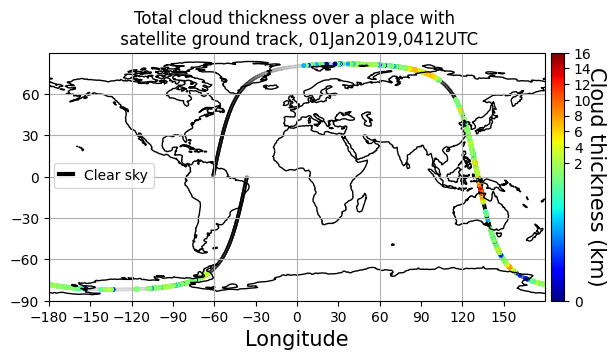

In [86]:
fig=plt.figure()
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.gridlines()
ax.set_xticks(np.arange(-180, 180, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude',fontsize=15)

#First do the groundtrack, then the cloud layer height
divnorm=colors.TwoSlopeNorm(vmin=0.00,vcenter=0.2,vmax=16)
ax.scatter(csatlon,csatlat,
edgecolors='black',
s=5,
alpha=0.002,
facecolors='none',
transform=ccrs.PlateCarree());

#Apply legend after plotting the ground track, otherwise the legend will appear near colorbar and not near the plot
lines=Line2D([0],[0],color='black',lw=3,linestyle='solid')
legend=plt.legend([lines],['Clear sky'],
fontsize=10,
handlelength=1,
loc=(0.01,0.455))
#Plotting the cloudlayerheight
plot=ax.scatter(csatlon,csatlat,c=cloudlayerheight,
s=5,
norm=divnorm, 
cmap='jet',
transform=ccrs.PlateCarree())
plt.title('Total cloud thickness over a place with \n satellite ground track, 01Jan2019,0412UTC')

#Add colorbar
cax =  fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar=plt.colorbar(plot,cax=cax)
cbar.set_label('Cloud thickness (km)',rotation=270,fontsize=15,labelpad=10) #labelpad is used to move the label away from the colorbar

plt.show()

# Check distribution total cloud thickness

[ 0.05999994  0.6080017   1.1560035   1.7040052   2.252007    2.8000088
  3.3480105   3.8960123   4.444014    4.992016    5.5400176   6.0880194
  6.636021    7.184023    7.7320247   8.280026    8.828029    9.37603
  9.924032   10.4720335  11.020036   11.568037   12.116039   12.664041
 13.212043   13.760044   14.308046   14.856048   15.40405    15.952051
 16.500053  ]
[3552 1980 1517  948  755  740  542  487  321  368  445  292  323  306
  194  137  105  109   93   39   44   34   30   35   20   27   82   17
   14    3]


Text(0.5, 1.0, 'Histogram of cloud thickness in one granule\nClear sky profiles removed, 01Jan2019,0412UTC')

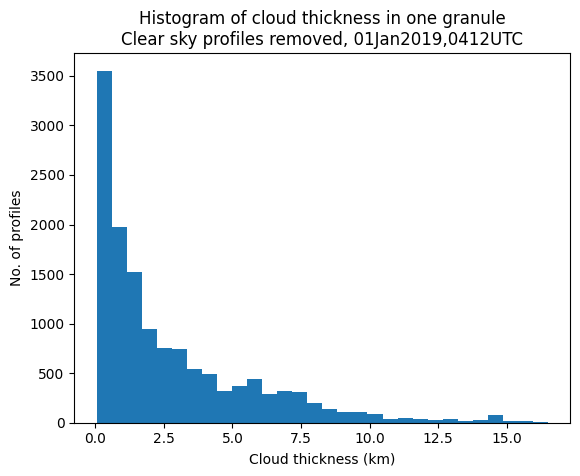

In [138]:
dump=np.ma.filled(cloudlayerheight,0)
dump=dump[dump!=0] #This is important as histogram appears to consider masked values to be 0. So, we need to remove the masked values(or dump==0) from the array
plt.hist(dump,bins=30)
plt.xlabel('Cloud thickness (km)')
plt.ylabel('No. of profiles')

#Print the bin edges

print(np.histogram(dump,bins=30)[1])
print(np.histogram(dump,bins=30)[0])
plt.title('Histogram of cloud thickness in one granule\nClear sky profiles removed, 01Jan2019,0412UTC')

# Plot a distribution of cloud type in a granule

Text(0.5, 1.0, 'Cloud type distribution in one granule\nClear sky profiles removed, 01Jan2019,0412UTC')

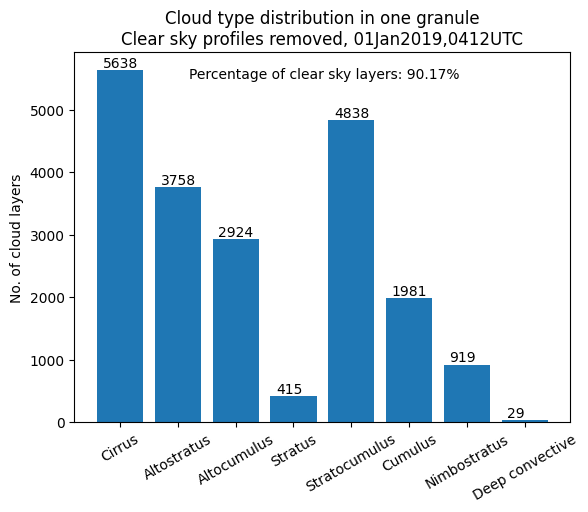

In [221]:
h = HDF.HDF(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019001041234_67528_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf")
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

csatfile=SD(r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019001041234_67528_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf",SDC.READ)

cloudlayertype=csatfile.select('CloudLayerType')[:,:]
cloudlayertype=np.ma.masked_equal(cloudlayertype,-9)
cloudonlytype=['Cirrus', 'Altostratus', 'Altocumulus', 'Stratus', 'Stratocumulus', 'Cumulus', 'Nimbostratus', 'Deep convective']
cloudtype_dict={0:'Clear',1:'Cirrus',2:'Altostratus',3:'Altocumulus',4:'Stratus',5:'Stratocumulus',6:'Cumulus',7:'Nimbostratus',8:'Deep convective',9:'Unknown'}

#Count the occurences of each cloud type in the entire array

countarray=np.unique(cloudlayertype,return_counts=True)
cloudtypecount=countarray[1]

#fig=plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

plt.bar(list(cloudtype_dict.values())[1:-1],cloudtypecount[1:-1])
for i in range(8):
    plt.text(i-0.3,cloudtypecount[i+1]+50,cloudtypecount[i+1],fontsize=10)
plt.text(1.2,5500,
"Percentage of clear sky layers: "+str(round(cloudtypecount[0]/np.sum(cloudtypecount[0:-1])*100,2))+"%",
fontsize=10)
#plt.text(5,8,cloudtypecount[0],fontsize=10)
plt.xticks(range(8),list(cloudtype_dict.values())[1:-1],  rotation=30);
plt.ylabel('No. of cloud layers')
plt.title('Cloud type distribution in one granule\nClear sky profiles removed, 01Jan2019,0412UTC')

#Add text in middle of bar plot indicating how many clear sky layers are there



In [213]:
cloudtypecount

array([188088,   5638,   3758,   2924,    415,   4838,   1981,    919,
           29, 160910], dtype=int64)

In [99]:
#Check how many rows of the array have all masked values

np.ma.getmask(cloudlayertop).all(axis=1).sum() #This is the number of rows with all masked values

23321

array([188088,   5638,   3758,   2924,    415,   4838,   1981,    919,
           29, 160910], dtype=int64)

In [175]:
[1,2,3][0:-1]

[1, 2]

In [1]:
import numpy as np
a=np.array([[1,2,3],[2,3,4]])
np.sum(a,axis=1)

array([6, 9])